In [6]:
import numpy as np

#
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib import colors
from matplotlib import cm
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 10000

from scipy.interpolate import interpn
import math
import warnings
%matplotlib inline
import xarray as xr
#import bisect
import sklearn

warnings.filterwarnings('ignore')

# on the header:
import matplotlib as mpl
import math
import pandas as pd

In [7]:
import gsw

In [8]:
ds = xr.open_dataset('/scratch/project_2000789/muramarg/waom_yearly_floats/output_WAOM_check/ocean_flt.nc')
ds1 = xr.open_dataset('/scratch/project_2000789/muramarg/waom_yearly_floats/output_WAOM_check/ocean_avg_0001.nc')
dg = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc')

## Create the dataframe for all points

In [9]:
# cmap*=-1

In [10]:
all_salt = ds.variables['salt'].values
all_temp = ds.variables['temp'].values
all_depth = ds.variables['depth'].values
depth_pres = all_depth*0.1 # pressure in dbar

In [11]:
# # write the potential densities to a text file gsw from all_salt and all_temp
# with open("/scratch/project_2000789/muramarg/SOM//meeting_1017/pot_dens1.txt", 'w') as f:
#     for j in range(pot_dens.shape[0]):
#         if j%5000 == 0:
#             print(j)
#         thisrow = np.array([])
#         for i in range(pot_dens.shape[1]):
#             if not np.isnan(all_salt[j][i]):
#                 rho=gsw.rho(all_salt[j][i],all_temp[j][i],depth_pres[j][i])
#                 rho -= 1000
#                 thisrow = np.append(thisrow,rho)
#             else:
#                 thisrow = np.append(thisrow,np.nan)
#         thisrow = [str(i) for i in thisrow]
#         f.write(','.join(thisrow))
#         f.write("\n")

In [12]:
# # # # read the file and add the potential density values from pot_dens.txt
with open("/scratch/project_2000789/muramarg/SOM//meeting_1017/pot_dens.txt","r") as g:
    inp = g.read()
    inp = inp.replace(',', '\n')
    inp = inp.splitlines()
g.close()

In [13]:
lines = np.reshape(inp,(65717,5460))

In [14]:
pot_dens = lines.astype(float)

In [15]:
# pot_dens.shape

In [16]:
# # # # read the file and add the density values from aabw_neutral_densities.txt
# with open("/scratch/project_2000789/muramarg/statistics/pygamman_f2py-master/pygamman_f2py-master/aabw_neutral_densities3.txt","r") as g:
# #     #lines = g.read().split("\n")
#     inp = g.read()
#     #print(input)
#     inp = inp.replace(',', '\n')
#     inp = inp.splitlines()
# g.close()

In [17]:
# lines = np.reshape(inp,(65717,5460))

In [18]:
# arr = lines.astype(float)

## Create the dataframe for arr

In [19]:
# # # # get an array of total lengths for lines in aabw_salt, aabw_temp
# total_l = np.array([])
# for i in range(len(aabw_salt[0])):
#     thissalt = aabw_salt[:,i]
#     thistemp = aabw_temp[:,i]
#     # set the current distance
#     dist = 0
#     for j in range(len(thissalt)-1):
#         if not math.isnan(thissalt[j]):
#             p = [thissalt[j],thistemp[j]]
#             q = [thissalt[j+1],thistemp[j+1]]
#             dist += (math.dist(p,q))
#     total_l = np.append(total_l,dist)  
# # get an array of the net lengths for aabw_salt,aabw_temp
# net_l = np.array([])
# for i in range(len(aabw_salt[0])):
#     x1 = aabw_salt[:,i]
#     x1 = x1[~np.isnan(x1)]
#     x2 = x1[-1]
#     x1 = x1[0]
#     y1 = aabw_temp[:,i]
#     y1 = y1[~np.isnan(y1)]
#     y2 = y1[-1]
#     y1 = y1[0]
    
#     p = [x1,y1]
#     q = [x2,y2]
#     # set the current distance
#     dist = (math.dist(p,q))
#     net_l = np.append(net_l,dist)   
# # create an array of net distance to total distance instead of both
# length_ratio = net_l/total_l

In [20]:
# # # # get arrays of the mean and stdev of depth
# aabw_depth = ds.variables['depth'].values
# depth_means = np.array([])
# depth_std = np.array([])
# for i in range(len(aabw_depth[0])):
#     d = aabw_depth[:,i]
#     d = d[~np.isnan(d)]
#     meand = sum(d)/len(d)
#     std_d = np.std(d)
   
#     # append these to the list
#     depth_means = np.append(depth_means,meand)
#     depth_std = np.append(depth_std,std_d)

In [21]:
# # # # get delta temperature and delta salinity
# t_init = np.array([])
# s_init = np.array([])
# t_final = np.array([])
# s_final = np.array([])
# for i in range(len(aabw_salt[0])):
#     thissalt = aabw_salt[:,i]
#     thistemp = aabw_temp[:,i]
#     thissalt = thissalt[~np.isnan(thissalt)]
#     thistemp = thistemp[~np.isnan(thistemp)]
    
#     t_init = np.append(t_init,thistemp[0])
#     s_init = np.append(s_init,thissalt[0])
#     t_final = np.append(t_final,thistemp[-1])
#     s_final = np.append(s_final,thissalt[-1])   
# dt = t_final-t_init
# dsalt = s_final-s_init

In [22]:
# # get delta density as a variable from arr
# d_init = np.array([])
# d_final = np.array([])
# for idx in range(arr.shape[1]):
#     thisdens = arr[:,idx]
#     thisdens = thisdens[~np.isnan(thisdens)]
#     d_init = np.append(d_init,thisdens[0])
#     d_final = np.append(d_final,thisdens[-1])
# ddens = d_final-d_init

In [23]:
# # get delta density as a variable from arr
# d_init = np.array([])
# d_final = np.array([])
# for idx in range(pot_dens.shape[1]):
#     thisdens = pot_dens[:,idx]
#     thisdens = thisdens[~np.isnan(thisdens)]
#     d_init = np.append(d_init,thisdens[0])
#     d_final = np.append(d_final,thisdens[-1])
# ddens_pot = d_final-d_init

In [24]:
# # # # # time to reach the shelf break
# # # # # arr is the neutral densities
    
# # # # # create an array with the first value in AABW
# shelf_time = np.array([])
# for idx in range(0,5460):
#     # get the depth values
#     thisrow_depth = ds.variables['depth'].values[:,idx]
   
#     # find the first value that is not nan in the list
#     timena = thisrow_depth[~np.isnan(thisrow_depth)]
#     start_time = len(thisrow_depth)-len(timena)

# # # #     # get first criteria that matches value, take greatest index of these
#     resultd = np.where(thisrow_depth > (500))
#     if len(resultd[0])>0:
#         endd = (resultd[0][0])
#         shelf_time = np.append(shelf_time,endd-start_time)
#     else:
#         # if it doesn't leave the shelf, put the maximum time
#         endd = len(thisrow_depth)
#         shelf_time = np.append(shelf_time,endd-start_time)
# shelf_time = shelf_time*900/86400
# shelf_time

In [25]:
# df = pd.DataFrame()
# df["net distance:total distance"] = length_ratio
# df["mean depth"] = depth_means
# df["std depth"] = depth_std
# df["dT"] = dt
# df["d salt"] = dsalt
# df["d density"] = ddens
# df["time to shelf"] = shelf_time
# df

## Add to and read from a text file for easier access

In [26]:
# # # # # write the values to a text file to load them later
# with open('/scratch/project_2000789/muramarg/SOM/meeting_1017/df_allpts.txt', 'w') as f:
#     for i in length_ratio:
#         f.write(str(i)+",")
#     f.write("\n")
#     for i in depth_means:
#         f.write(str(i)+",")
#     f.write("\n")
#     for i in depth_std:
#         f.write(str(i)+",")
#     f.write("\n")
#     for i in dt:
#         f.write(str(i)+",")
#     f.write("\n")
#     for i in dsalt:
#         f.write(str(i)+",")
#     f.write("\n")
#     for i in ddens:
#         f.write(str(i)+",")
#     f.write("\n")
#     for i in shelf_time:
#         f.write(str(i)+",")
#     f.write("\n")
#     for i in ddens_pot:
#         f.write(str(i)+",")
#     f.write("\n")
# f.close()

In [27]:
# with open("/scratch/project_2000789/muramarg/SOM/meeting_1017/df_allpts.txt", 'a') as f: 
#     for i in ddens:
#         f.write(str(i)+",")
#         f.write("\n")
# f.close()

In [28]:
# read the file and add the density values from aabw_neutral_densities.txt
with open("/scratch/project_2000789/muramarg/SOM/meeting_1017/df_allpts.txt","r") as g:
    inp = g.readlines()
g.close()

In [29]:
len(inp)

8

In [30]:
# read from the text file to make things faster
length_ratio1 = np.array([inp[0].split(',')[:-1]]).astype(float)
depth_means1 = np.array([inp[1].split(',')[:-1]]).astype(float)
depth_std1 = np.array([inp[2].split(',')[:-1]]).astype(float)
dt1 = np.array([inp[3].split(',')[:-1]]).astype(float)
dsalt1 = np.array([inp[4].split(',')[:-1]]).astype(float)
ddens1 = np.array([inp[7].split(',')[:-1]]).astype(float)
shelf_time1 = np.array([inp[6].split(',')[:-1]]).astype(float)

In [31]:
# replace time to shelf nan values 

In [32]:
df = pd.DataFrame()
df["net distance:total distance"] = length_ratio1[0]
df["mean depth"] = depth_means1[0]
df["std depth"] = depth_std1[0]
df["dT"] = dt1[0]
df["d salt"] = dsalt1[0]
df["d density"] = ddens1[0]
df["time to shelf"] = shelf_time1[0]
df

,net distance:total distance,mean depth,std depth,dT,d salt,d density,time to shelf
0,0.073205,358.836655,152.250534,-1.407402,0.087379,0.340220,259.031250
1,0.033335,586.706361,444.646362,-0.743235,0.218391,1.107802,152.906250
2,0.106888,280.551893,134.662430,-2.710640,0.172638,0.426925,149.083333
3,0.262303,421.582263,244.931870,-4.369052,0.347824,0.682872,257.677083
4,0.156761,309.248186,149.216553,-2.306775,0.204514,0.389524,466.343750
...,...,...,...,...,...,...,...
5455,0.018970,105.351402,30.881298,0.228904,-0.181553,-0.092634,355.541667
5456,0.032637,200.433027,71.832832,0.280308,0.005367,0.105686,348.541667
5457,0.012778,128.087293,44.612846,0.092616,-0.070576,0.006026,341.541667
5458,0.042704,138.007896,75.085968,-0.576451,0.002899,0.068795,334.541667


## Create the SOM

In [33]:
x = df.iloc[:,:].values
#y = df.iloc[:,-1].values
import sklearn
#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
sc = sklearn.preprocessing.MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

#### Create quantization error

In [ ]:
# som1 = MiniSom(x=2,y=2,input_len=7,sigma=1.0,learning_rate=0.5)
# som1.random_weights_init(x)
# som1.train_random(data=x,num_iteration=100)

# som2 = MiniSom(x=2,y=3,input_len=7,sigma=1.0,learning_rate=0.5)
# som2.random_weights_init(x)
# som2.train_random(data=x,num_iteration=100)

# som3 = MiniSom(x=3,y=3,input_len=7,sigma=1.0,learning_rate=0.5)
# som3.random_weights_init(x)
# som3.train_random(data=x,num_iteration=100)

# som4 = MiniSom(x=4,y=4,input_len=7,sigma=1.0,learning_rate=0.5)
# som4.random_weights_init(x)
# som4.train_random(data=x,num_iteration=100)

# som5 = MiniSom(x=4,y=6,input_len=7,sigma=1.0,learning_rate=0.5)
# som5.random_weights_init(x)
# som5.train_random(data=x,num_iteration=100)

# som6 = MiniSom(x=6,y=6,input_len=7,sigma=1.0,learning_rate=0.5)
# som6.random_weights_init(x)
# som6.train_random(data=x,num_iteration=100)

# som7 = MiniSom(x=6,y=7,input_len=7,sigma=1.0,learning_rate=0.5)
# som7.random_weights_init(x)
# som7.train_random(data=x,num_iteration=100)

In [ ]:
# max_iter = 100
# q_error1 = []
# q_error2 = []
# q_error3 = []
# q_error4 = []
# q_error5 = []
# q_error6 = []
# q_error7 = []

# fig = plt.figure(figsize= (10,5))

# for i in range(max_iter):
#     rand_i = np.random.randint(len(x))
#     som1.update(x[rand_i], som1.winner(x[rand_i]), i)
#     q_error1.append(som1.quantization_error(x))
    
# #     rand_i = np.random.randint(len(x))
# #     som2.update(x[rand_i], som2.winner(x[rand_i]), i)
# #     q_error2.append(som2.quantization_error(x))
    
# #     rand_i = np.random.randint(len(x))
# #     som3.update(x[rand_i], som3.winner(x[rand_i]), i)
# #     q_error3.append(som3.quantization_error(x))
    
# #     rand_i = np.random.randint(len(x))
# #     som4.update(x[rand_i], som4.winner(x[rand_i]), i)
# #     q_error4.append(som4.quantization_error(x))
    
# #     rand_i = np.random.randint(len(x))
# #     som5.update(x[rand_i], som5.winner(x[rand_i]), i)
# #     q_error5.append(som5.quantization_error(x))
    
# #     rand_i = np.random.randint(len(x))
# #     som6.update(x[rand_i], som6.winner(x[rand_i]), i)
# #     q_error6.append(som6.quantization_error(x))
    
# #     rand_i = np.random.randint(len(x))
# #     som7.update(x[rand_i], som7.winner(x[rand_i]), i)
# #     q_error7.append(som7.quantization_error(x))

# plt.title("Quantization Error")
# plt.plot(np.arange(max_iter), q_error1, label='2x2')
# # plt.plot(np.arange(max_iter), q_error2, label='2x3')
# # plt.plot(np.arange(max_iter), q_error3, label='3x3')
# # plt.plot(np.arange(max_iter), q_error4, label='4x4')
# # plt.plot(np.arange(max_iter), q_error5, label='4x6')
# # plt.plot(np.arange(max_iter), q_error6, label='6x6')
# # plt.plot(np.arange(max_iter), q_error7, label='6x7')
# plt.ylabel('error')
# plt.xlabel('iteration index')
# plt.legend()

# plt.savefig("/scratch/project_2000789/muramarg/SOM/meeting_1017/quantization_error.png", dpi=300)
# plt.show()

#### Create SOM with 3x3

In [72]:
som = MiniSom(x=3,y=3,input_len=7,sigma=1.0,learning_rate=0.5)
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

In [73]:
som.distance_map()

array([[0.23147702, 0.58470861, 0.37022963],
       [0.54106668, 1.        , 0.72090504],
       [0.38485612, 0.75548614, 0.37356031]])

(5460,)


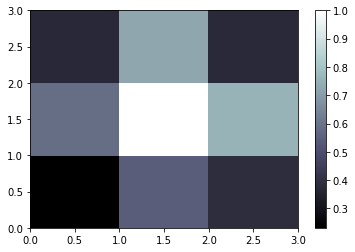

In [74]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()

# make an array for the groupings
groupings = np.empty((0,2))
for i,a in enumerate(x):
    w = som.winner(a)
    groupings = np.append(groupings,np.array([w]),axis=0)
#print(groupings)

# remake the groupings into numbers
gr_idx = np.array([])
for l in groupings:
    if l[0] == 0:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,0)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,1)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,2)
    elif l[0] == 1:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,3)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,4)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,5)
    elif l[0] == 2:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,6)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,7)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,8)
print(gr_idx.shape)

In [75]:
aabw_idx = np.arange(0,5460)

In [76]:
aabw_cmap = np.tile(gr_idx,(65717,1))
aabw_cmap.shape
# aabw_cmap

(65717, 5460)

In [77]:
aabw_salt = ds.variables['salt'].values
aabw_temp = ds.variables['temp'].values
aabw_cmap = ds.variables['depth'].values

In [78]:
# break down the aabw_salt and aabw_temp by the indices of the groups
group0 = np.where(gr_idx == 0)
group1 = np.where(gr_idx == 1)
group2 = np.where(gr_idx == 2)
group3 = np.where(gr_idx == 3)
group4 = np.where(gr_idx == 4)
group5 = np.where(gr_idx == 5)
group6 = np.where(gr_idx == 6)
group7 = np.where(gr_idx == 7)
group8 = np.where(gr_idx == 8)

# group hte aabw_salt and aabw_temp by these indices
aabw_salt0 = aabw_salt[:,group0]
aabw_salt1 = aabw_salt[:,group1]
aabw_salt2 = aabw_salt[:,group2]
aabw_salt3 = aabw_salt[:,group3]
aabw_salt4 = aabw_salt[:,group4]
aabw_salt5 = aabw_salt[:,group5]
aabw_salt6 = aabw_salt[:,group6]
aabw_salt7 = aabw_salt[:,group7]
aabw_salt8 = aabw_salt[:,group8]

aabw_temp0 = aabw_temp[:,group0]
aabw_temp1 = aabw_temp[:,group1]
aabw_temp2 = aabw_temp[:,group2]
aabw_temp3 = aabw_temp[:,group3]
aabw_temp4 = aabw_temp[:,group4]
aabw_temp5 = aabw_temp[:,group5]
aabw_temp6 = aabw_temp[:,group6]
aabw_temp7 = aabw_temp[:,group7]
aabw_temp8 = aabw_temp[:,group8]

In [79]:
#gr_idx.shape
group0 = np.where(gr_idx == 0)[0]
group1 = np.where(gr_idx == 1)[0]
group2 = np.where(gr_idx == 2)[0]
group3 = np.where(gr_idx == 3)[0]
group4 = np.where(gr_idx == 4)[0]
group5 = np.where(gr_idx == 5)[0]
group6 = np.where(gr_idx == 6)[0]
group7 = np.where(gr_idx == 7)[0]
group8 = np.where(gr_idx == 8)[0]

group0n = np.array([],dtype=int)
for i in group0:
    group0n = np.append(group0n,int(aabw_idx[i]))
group1n = np.array([],dtype=int)
for i in group1:
    group1n = np.append(group1n,int(aabw_idx[i]))
group2n = np.array([],dtype=int)
for i in group2:
    group2n = np.append(group2n,int(aabw_idx[i]))
group3n = np.array([],dtype=int)
for i in group3:
    group3n = np.append(group3n,int(aabw_idx[i]))
group4n = np.array([],dtype=int)
for i in group4:
    group4n = np.append(group4n,int(aabw_idx[i]))
group5n = np.array([],dtype=int)
for i in group5:
    group5n = np.append(group5n,int(aabw_idx[i]))
group6n = np.array([],dtype=int)
for i in group6:
    group6n = np.append(group6n,int(aabw_idx[i]))
group7n = np.array([],dtype=int)
for i in group7:
    group7n = np.append(group7n,int(aabw_idx[i]))
group8n = np.array([],dtype=int)
for i in group8:
    group8n = np.append(group8n,int(aabw_idx[i]))

In [80]:
# find the average location pathway for each group
group0x = ds.variables['Xgrid'][:,group0n]
group1x = ds.variables['Xgrid'][:,group1n]
group2x = ds.variables['Xgrid'][:,group2n]
group3x = ds.variables['Xgrid'][:,group3n]
group4x = ds.variables['Xgrid'][:,group4n]
group5x = ds.variables['Xgrid'][:,group5n]
group6x = ds.variables['Xgrid'][:,group6n]
group7x = ds.variables['Xgrid'][:,group7n]
group8x = ds.variables['Xgrid'][:,group8n]

group0y = ds.variables['Ygrid'][:,group0n]
group1y = ds.variables['Ygrid'][:,group1n]
group2y = ds.variables['Ygrid'][:,group2n]
group3y = ds.variables['Ygrid'][:,group3n]
group4y = ds.variables['Ygrid'][:,group4n]
group5y = ds.variables['Ygrid'][:,group5n]
group6y = ds.variables['Ygrid'][:,group6n]
group7y = ds.variables['Ygrid'][:,group7n]
group8y = ds.variables['Ygrid'][:,group8n]

In [81]:
# # THESE ARE IN GRID POINTS not spherical
# fig = plt.figure(figsize=(20,20))
# fig.tight_layout(pad=10)
# ax = fig.add_subplot(3, 3, 1)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group0x,group0y,marker='.',s=0.1,color='tab:blue',alpha=0.2)

# ax = fig.add_subplot(3, 3, 2)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group1x,group1y,marker='.',s=0.1,color='tab:orange',alpha=0.2)

# ax = fig.add_subplot(3, 3, 3)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group2x,group2y,marker='.',s=0.1,color='tab:green',alpha=0.2)

# ax = fig.add_subplot(3, 3, 4)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group3x,group3y,marker='.',s=0.1,color='tab:red',alpha=0.2)

# ax = fig.add_subplot(3, 3, 5)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group4x,group4y,marker='.',s=0.1,color='tab:purple',alpha=0.2)

# ax = fig.add_subplot(3, 3, 6)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group5x,group5y,marker='.',s=0.1,color='tab:brown',alpha=0.2)

# ax = fig.add_subplot(3, 3, 7)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group6x,group6y,marker='.',s=0.1,color='tab:pink',alpha=0.2)

# ax = fig.add_subplot(3, 3, 8)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group7x,group7y,marker='.',s=0.1,color='tab:gray',alpha=0.2)

# ax = fig.add_subplot(3, 3, 9)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group8x,group8y,marker='.',s=0.1,color='tab:cyan',alpha=0.2)

# plt.savefig("/scratch/project_2000789/muramarg/SOM/meeting_1017/3by3_mapped_aabw.png", dpi=300)

In [82]:
# first see the numbers of floats in each group
df1 = pd.DataFrame()
nmpts = np.array([])
nmpts = np.append(nmpts,len(group0))
nmpts = np.append(nmpts,len(group1))
nmpts = np.append(nmpts,len(group2))
nmpts = np.append(nmpts,len(group3))
nmpts = np.append(nmpts,len(group4))
nmpts = np.append(nmpts,len(group5))
nmpts = np.append(nmpts,len(group6))
nmpts = np.append(nmpts,len(group7))
nmpts = np.append(nmpts,len(group8))

# add this to the dataframe
df1["# of points"] = nmpts
df1

,# of points
0,635.0
1,719.0
2,737.0
3,1238.0
4,119.0
5,534.0
6,1060.0
7,215.0
8,203.0


## Look at the distributions of the values to see if one is AABW

In [83]:
# make array of the groups
groups = np.array([group0,group1,group2,group3,group4,group5,group6,group7,group8])

# add mean and stdev of group variables to dataframe
dist_ratio_mean = np.array([])
dist_ratio_stdev = np.array([])
mean_d_mean = np.array([])
mean_d_stdev = np.array([])
std_depth_mean = np.array([])
delta_salt_mean = np.array([])
delta_salt_stdev = np.array([])
delta_density_mean = np.array([])
delta_density_stdev = np.array([])

for group in groups:
    dist_ratio_mean = np.append(dist_ratio_mean,np.mean(df["net distance:total distance"][group].values))
    dist_ratio_stdev = np.append(dist_ratio_stdev,np.std(df["net distance:total distance"][group].values))
    mean_d_mean = np.append(mean_d_mean,np.mean(df["mean depth"][group].values))
    mean_d_stdev = np.append(mean_d_stdev,np.std(df["mean depth"][group].values))
    std_depth_mean = np.append(std_depth_mean,np.mean(df["std depth"][group].values))
    delta_salt_mean = np.append(delta_salt_mean,np.mean(df["d salt"][group].values))
    delta_salt_stdev = np.append(delta_salt_stdev,np.std(df["d salt"][group].values))
    delta_density_mean = np.append(delta_density_mean,np.mean(df["d density"][group].values))
    delta_density_stdev = np.append(delta_density_stdev,np.std(df["d density"][group].values))

In [84]:
df1["Distance ratio mean"] = dist_ratio_mean
df1["Distance ratio stdev"] = dist_ratio_stdev
df1["Mean depth mean"] = mean_d_mean
df1["Mean depth stdev"] = mean_d_stdev
df1["stdev depth"] = std_depth_mean
df1["delta salt mean"] = delta_salt_mean
df1["delta salt stdev"] = delta_salt_stdev
df1["delta density mean"] = delta_density_mean
df1["delta density stdev"] = delta_density_stdev
df1

,# of points,Distance ratio mean,Distance ratio stdev,Mean depth mean,Mean depth stdev,stdev depth,delta salt mean,delta salt stdev,delta density mean,delta density stdev
0,635.0,NaN,NaN,267.887291,76.343803,165.327879,-0.063322,1.937310,0.135522,1.580153
1,719.0,0.084931,0.046140,468.821283,163.537719,277.881600,0.047378,0.206542,0.349340,0.344642
2,737.0,0.200431,0.078528,1460.705745,845.103534,754.525790,0.093784,0.144362,1.026457,0.560856
3,1238.0,0.045445,0.030588,166.626266,71.486912,95.176521,-0.058025,0.151823,0.072453,0.193319
4,119.0,0.101415,0.051420,390.039199,126.209830,358.657474,0.091647,0.163571,0.554639,0.334578
5,534.0,0.148426,0.077956,1611.867401,720.323975,1249.532220,0.231856,0.239369,1.578691,0.616210
6,1060.0,0.091401,0.063744,161.291223,71.207644,75.598261,0.213738,0.283600,0.325169,0.288375
7,215.0,0.162985,0.091834,282.377542,114.206577,207.217507,0.258125,0.243287,0.557320,0.399121
8,203.0,0.192486,0.151455,665.060851,240.666262,605.521661,0.372244,0.281409,1.080534,0.533494


In [85]:
# find the average ending salinity, Temperature, density, and pressure for the groups
endS = np.array([])
endT = np.array([])
enddens = np.array([])
enddepth = np.array([])

In [86]:
for group in groups:
    endS = np.append(endS,np.mean(ds.variables["salt"].values[-1][group]))
    endT = np.append(endT,np.mean(ds.variables["temp"].values[-1][group]))
    enddens = np.append(enddens,np.mean(pot_dens[-1][group]))
    enddepth = np.append(enddepth,np.mean(ds.variables["depth"][-1][group]))

In [67]:
# with open('/scratch/project_2000789/muramarg/statistics/pygamman_f2py-master/pygamman_f2py-master/aabw_salt_group.txt', 'w') as f:
#     for i in salt:
#         f.write(str(i))
#         f.write("\n")
# f.close()

# with open('/scratch/project_2000789/muramarg/statistics/pygamman_f2py-master/pygamman_f2py-master/aabw_temp_group.txt', 'w') as f:
#     for row in temp:
#         f.write(str(i))
#         f.write("\n")
# f.close()

# with open('/scratch/project_2000789/muramarg/statistics/pygamman_f2py-master/pygamman_f2py-master/aabw_pres_group.txt', 'w') as f:
#     for row in pres:
#         #row = ' '.join(map(str, row))
#         f.write(str(i))
#         f.write("\n")
# f.close()

In [87]:
# the requirements for AABW are that >28.27 neutral density, 3500+ ft depth, Salinity 34.6-34.75, Temperature <0
df2 = pd.DataFrame()
df2["mean final s"] = endS
df2["mean final T"] = endT
df2["mean final rho"] = enddens
df2["mean final depth"] = enddepth*3.281
#df2["mean neutral rho"] = gamma_n
df2

,mean final s,mean final T,mean final rho,mean final depth
0,34.346188,-1.408988,27.687328,-1220.380506
1,34.520172,-1.052873,27.962621,-2248.431411
2,34.625652,-0.359745,28.694079,-6907.230729
3,34.411354,-1.386378,27.685755,-856.126525
4,34.567577,-0.707181,28.167665,-3487.620895
5,34.641357,-0.292891,29.128632,-9840.735501
6,34.421455,-1.367438,27.677709,-750.560841
7,34.505054,-1.560476,27.918552,-1901.162473
8,34.576447,-0.916164,28.406352,-5043.986795


In [69]:
# calculate the potential density based on the T, S and depth
salt = df2["mean final s"]
temp = df2["mean final T"]
pres = df2["mean final depth"]*0.1

In [ ]:
# with open('/scratch/project_2000789/muramarg/statistics/pygamman_f2py-master/pygamman_f2py-master/df_gamma.txt', 'r') as f:
#     gamma_n = f.readlines()
# f.close()

In [ ]:
# gamma_n = np.array([17.865856170654297,18.017169952392578,18.1262264251709,17.962688446044922,18.05777359008789,18.167863845825195,17.961305618286133,18.035255432128906,18.15632438659668])
# gamma_n = gamma_n + 10

In [90]:
# select groups based on conditions
df4 = df2[df2['mean final depth'] <= -3500]
#df4 = df4[df4["salinity"]]
df5 = df4[df4["mean final s"] > 34.6]

In [91]:
df5

,mean final s,mean final T,mean final rho,mean final depth
2,34.625652,-0.359745,28.694079,-6907.230729
5,34.641357,-0.292891,29.128632,-9840.735501


## Retrain the dataset with the above points groups

In [93]:
aabw_idx = np.concatenate((group2,group5))
aabw_idx.shape

(1271,)

In [95]:
aabw_idx

array([  17,   18,   52, ..., 5410, 5434, 5439])

In [94]:
df = df.iloc[aabw_idx]
df

,net distance:total distance,mean depth,std depth,dT,d salt,d density,time to shelf
17,0.369984,752.562790,317.126709,-1.141888,0.116756,0.694055,81.781250
18,0.072166,1072.659941,854.602661,0.897097,0.236423,1.191418,130.218750
52,0.076406,1093.049608,626.198975,1.227705,0.321270,0.985944,183.635417
68,0.186760,817.950923,405.606323,1.519619,0.057434,0.470840,121.135417
73,0.152179,1336.957750,931.876587,1.542820,0.098309,1.201767,161.239583
...,...,...,...,...,...,...,...
5362,0.095280,2490.390726,1784.798096,-1.534693,0.376858,2.484197,214.552083
5391,0.050514,677.632016,857.697632,0.838203,0.068504,1.090070,241.041667
5410,0.035089,1894.496735,1185.881470,0.268259,0.360142,1.896858,137.395833
5434,0.265898,2362.878106,1699.251465,1.580574,0.018871,1.996628,156.187500


In [96]:
x = df.iloc[:,:].values
#y = df.iloc[:,-1].values
import sklearn
#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
sc = sklearn.preprocessing.MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

In [97]:
som = MiniSom(x=3,y=3,input_len=7,sigma=1.0,learning_rate=0.5)
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

(1271,)


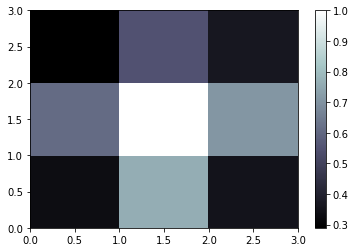

In [98]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()

# make an array for the groupings
groupings = np.empty((0,2))
for i,a in enumerate(x):
    w = som.winner(a)
    groupings = np.append(groupings,np.array([w]),axis=0)
#print(groupings)

# remake the groupings into numbers
gr_idx = np.array([])
for l in groupings:
    if l[0] == 0:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,0)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,1)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,2)
    elif l[0] == 1:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,3)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,4)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,5)
    elif l[0] == 2:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,6)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,7)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,8)
print(gr_idx.shape)

In [99]:
# break down the aabw_salt and aabw_temp by the indices of the groups
group0 = np.where(gr_idx == 0)
group1 = np.where(gr_idx == 1)
group2 = np.where(gr_idx == 2)
group3 = np.where(gr_idx == 3)
group4 = np.where(gr_idx == 4)
group5 = np.where(gr_idx == 5)
group6 = np.where(gr_idx == 6)
group7 = np.where(gr_idx == 7)
group8 = np.where(gr_idx == 8)

# group hte aabw_salt and aabw_temp by these indices
aabw_salt0 = aabw_salt[:,group0]
aabw_salt1 = aabw_salt[:,group1]
aabw_salt2 = aabw_salt[:,group2]
aabw_salt3 = aabw_salt[:,group3]
aabw_salt4 = aabw_salt[:,group4]
aabw_salt5 = aabw_salt[:,group5]
aabw_salt6 = aabw_salt[:,group6]
aabw_salt7 = aabw_salt[:,group7]
aabw_salt8 = aabw_salt[:,group8]

aabw_temp0 = aabw_temp[:,group0]
aabw_temp1 = aabw_temp[:,group1]
aabw_temp2 = aabw_temp[:,group2]
aabw_temp3 = aabw_temp[:,group3]
aabw_temp4 = aabw_temp[:,group4]
aabw_temp5 = aabw_temp[:,group5]
aabw_temp6 = aabw_temp[:,group6]
aabw_temp7 = aabw_temp[:,group7]
aabw_temp8 = aabw_temp[:,group8]

In [100]:
#gr_idx.shape
group0 = np.where(gr_idx == 0)[0]
group1 = np.where(gr_idx == 1)[0]
group2 = np.where(gr_idx == 2)[0]
group3 = np.where(gr_idx == 3)[0]
group4 = np.where(gr_idx == 4)[0]
group5 = np.where(gr_idx == 5)[0]
group6 = np.where(gr_idx == 6)[0]
group7 = np.where(gr_idx == 7)[0]
group8 = np.where(gr_idx == 8)[0]

group0n = np.array([],dtype=int)
for i in group0:
    group0n = np.append(group0n,int(aabw_idx[i]))
group1n = np.array([],dtype=int)
for i in group1:
    group1n = np.append(group1n,int(aabw_idx[i]))
group2n = np.array([],dtype=int)
for i in group2:
    group2n = np.append(group2n,int(aabw_idx[i]))
group3n = np.array([],dtype=int)
for i in group3:
    group3n = np.append(group3n,int(aabw_idx[i]))
group4n = np.array([],dtype=int)
for i in group4:
    group4n = np.append(group4n,int(aabw_idx[i]))
group5n = np.array([],dtype=int)
for i in group5:
    group5n = np.append(group5n,int(aabw_idx[i]))
group6n = np.array([],dtype=int)
for i in group6:
    group6n = np.append(group6n,int(aabw_idx[i]))
group7n = np.array([],dtype=int)
for i in group7:
    group7n = np.append(group7n,int(aabw_idx[i]))
group8n = np.array([],dtype=int)
for i in group8:
    group8n = np.append(group8n,int(aabw_idx[i]))

In [101]:
# find the average location pathway for each group
group0x = ds.variables['Xgrid'][:,group0n]
group1x = ds.variables['Xgrid'][:,group1n]
group2x = ds.variables['Xgrid'][:,group2n]
group3x = ds.variables['Xgrid'][:,group3n]
group4x = ds.variables['Xgrid'][:,group4n]
group5x = ds.variables['Xgrid'][:,group5n]
group6x = ds.variables['Xgrid'][:,group6n]
group7x = ds.variables['Xgrid'][:,group7n]
group8x = ds.variables['Xgrid'][:,group8n]

group0y = ds.variables['Ygrid'][:,group0n]
group1y = ds.variables['Ygrid'][:,group1n]
group2y = ds.variables['Ygrid'][:,group2n]
group3y = ds.variables['Ygrid'][:,group3n]
group4y = ds.variables['Ygrid'][:,group4n]
group5y = ds.variables['Ygrid'][:,group5n]
group6y = ds.variables['Ygrid'][:,group6n]
group7y = ds.variables['Ygrid'][:,group7n]
group8y = ds.variables['Ygrid'][:,group8n]

In [102]:
# # THESE ARE IN GRID POINTS not spherical
# fig = plt.figure(figsize=(20,20))
# fig.tight_layout(pad=10)
# ax = fig.add_subplot(3, 3, 1)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group0x,group0y,marker='.',s=0.1,color='tab:blue',alpha=0.2)

# ax = fig.add_subplot(3, 3, 2)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group1x,group1y,marker='.',s=0.1,color='tab:orange',alpha=0.2)

# ax = fig.add_subplot(3, 3, 3)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group2x,group2y,marker='.',s=0.1,color='tab:green',alpha=0.2)

# ax = fig.add_subplot(3, 3, 4)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group3x,group3y,marker='.',s=0.1,color='tab:red',alpha=0.2)

# ax = fig.add_subplot(3, 3, 5)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group4x,group4y,marker='.',s=0.1,color='tab:purple',alpha=0.2)

# ax = fig.add_subplot(3, 3, 6)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group5x,group5y,marker='.',s=0.1,color='tab:brown',alpha=0.2)

# ax = fig.add_subplot(3, 3, 7)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group6x,group6y,marker='.',s=0.1,color='tab:pink',alpha=0.2)

# ax = fig.add_subplot(3, 3, 8)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group7x,group7y,marker='.',s=0.1,color='tab:gray',alpha=0.2)

# ax = fig.add_subplot(3, 3, 9)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group8x,group8y,marker='.',s=0.1,color='tab:cyan',alpha=0.2)

# plt.savefig("/scratch/project_2000789/muramarg/SOM/meeting_1017/3by3_mapped_aabw_secondset.png", dpi=300)

In [103]:
# first see the numbers of floats in each group
df1 = pd.DataFrame()
nmpts = np.array([])
nmpts = np.append(nmpts,len(group0))
nmpts = np.append(nmpts,len(group1))
nmpts = np.append(nmpts,len(group2))
nmpts = np.append(nmpts,len(group3))
nmpts = np.append(nmpts,len(group4))
nmpts = np.append(nmpts,len(group5))
nmpts = np.append(nmpts,len(group6))
nmpts = np.append(nmpts,len(group7))
nmpts = np.append(nmpts,len(group8))

# add this to the dataframe
df1["# of points"] = nmpts
df1

,# of points
0,78.0
1,158.0
2,143.0
3,100.0
4,53.0
5,180.0
6,153.0
7,194.0
8,212.0


In [104]:
# find the average ending salinity, Temperature, density, and pressure for the groups
endS = np.array([])
endT = np.array([])
enddens = np.array([])
enddepth = np.array([])

In [105]:
for group in groups:
    endS = np.append(endS,np.mean(ds.variables["salt"].values[-1][group]))
    endT = np.append(endT,np.mean(ds.variables["temp"].values[-1][group]))
    enddens = np.append(enddens,np.mean(pot_dens[-1][group]))
    enddepth = np.append(enddepth,np.mean(ds.variables["depth"][-1][group]))

In [106]:
# the requirements for AABW are that >28.27 neutral density, 3500+ ft depth, Salinity 34.6-34.75, Temperature <0
df_2ndround = pd.DataFrame()
df_2ndround["mean final s"] = endS
df_2ndround["mean final T"] = endT
df_2ndround["mean final rho"] = enddens
df_2ndround["mean final depth"] = enddepth*3.281
df_2ndround

,mean final s,mean final T,mean final rho,mean final depth
0,34.346188,-1.408988,27.687328,-1220.380506
1,34.520172,-1.052873,27.962621,-2248.431411
2,34.625652,-0.359745,28.694079,-6907.230729
3,34.411354,-1.386378,27.685755,-856.126525
4,34.567577,-0.707181,28.167665,-3487.620895
5,34.641357,-0.292891,29.128632,-9840.735501
6,34.421455,-1.367438,27.677709,-750.560841
7,34.505054,-1.560476,27.918552,-1901.162473
8,34.576447,-0.916164,28.406352,-5043.986795


In [108]:
# select groups based on conditions
df_2ndround = df_2ndround[df_2ndround['mean final depth'] <= -3500]
df_2ndrounda = df_2ndround[df_2ndround['mean final s'] > 34.6]
df_2ndrounda

,mean final s,mean final T,mean final rho,mean final depth
2,34.625652,-0.359745,28.694079,-6907.230729
5,34.641357,-0.292891,29.128632,-9840.735501


In [112]:
current_idxs = aabw_idx[test]
current_idxs.shape

(323,)

In [113]:
test = np.concatenate((group2,group5))

df = df.iloc[test]
df

,net distance:total distance,mean depth,std depth,dT,d salt,d density,time to shelf
81,0.118446,818.735212,467.532928,1.282718,0.043087,0.499073,143.218750
82,0.186818,948.668300,653.278015,1.413091,0.082668,0.704364,144.687500
125,0.181722,755.509657,472.916443,1.652566,0.002495,0.447435,192.197917
138,0.278272,1159.362692,875.363831,1.575027,0.018482,0.548719,183.822917
149,0.140219,705.541169,605.375854,1.144655,-0.029697,0.183437,173.739583
...,...,...,...,...,...,...,...
5377,0.076687,896.354068,614.187317,0.787759,0.163891,0.742651,112.072917
5421,0.169650,820.437150,374.219208,1.688667,0.172916,0.655963,121.625000
5428,0.172106,866.436990,417.665833,1.660383,0.058460,0.534301,110.479167
5433,0.193402,1232.316624,718.884888,1.606288,0.046921,1.144661,129.552083


## Look at the type of mixing that is occurring and where

In [114]:
aabw_salt = ds.variables['salt'].values
aabw_temp = ds.variables['temp'].values
aabw_cmap = ds.variables['depth'].values

(323,)


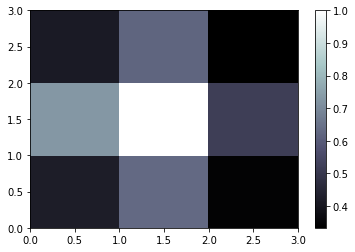

In [115]:
# select a new SOM based on test
#df = df.iloc[test]

x = df.iloc[:,:].values
#y = df.iloc[:,-1].values
import sklearn
#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
sc = sklearn.preprocessing.MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

som = MiniSom(x=3,y=3,input_len=7,sigma=1.0,learning_rate=0.5)
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()

# make an array for the groupings
groupings = np.empty((0,2))
for i,a in enumerate(x):
    w = som.winner(a)
    groupings = np.append(groupings,np.array([w]),axis=0)
#print(groupings)

# remake the groupings into numbers
gr_idx = np.array([])
for l in groupings:
    if l[0] == 0:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,0)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,1)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,2)
    elif l[0] == 1:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,3)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,4)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,5)
    elif l[0] == 2:
        if l[1] == 0:
            gr_idx = np.append(gr_idx,6)
        if l[1] == 1:
            gr_idx = np.append(gr_idx,7)
        if l[1] == 2:
            gr_idx = np.append(gr_idx,8)
print(gr_idx.shape)

# break down the aabw_salt and aabw_temp by the indices of the groups
group0 = np.where(gr_idx == 0)
group1 = np.where(gr_idx == 1)
group2 = np.where(gr_idx == 2)
group3 = np.where(gr_idx == 3)
group4 = np.where(gr_idx == 4)
group5 = np.where(gr_idx == 5)
group6 = np.where(gr_idx == 6)
group7 = np.where(gr_idx == 7)
group8 = np.where(gr_idx == 8)

In [116]:
group0 = list(group0)
group1 = list(group1)
group2 = list(group2)
group3 = list(group3)
group4 = list(group4)
group5 = list(group5)
group6 = list(group6)
group7 = list(group7)
group8 = list(group8)

In [117]:
# group hte aabw_salt and aabw_temp by these indices
aabw_salt0 = aabw_salt[:,group0]
aabw_salt1 = aabw_salt[:,group1]
aabw_salt2 = aabw_salt[:,group2]
aabw_salt3 = aabw_salt[:,group3]
aabw_salt4 = aabw_salt[:,group4]
aabw_salt5 = aabw_salt[:,group5]
aabw_salt6 = aabw_salt[:,group6]
aabw_salt7 = aabw_salt[:,group7]
aabw_salt8 = aabw_salt[:,group8]

aabw_temp0 = aabw_temp[:,group0]
aabw_temp1 = aabw_temp[:,group1]
aabw_temp2 = aabw_temp[:,group2]
aabw_temp3 = aabw_temp[:,group3]
aabw_temp4 = aabw_temp[:,group4]
aabw_temp5 = aabw_temp[:,group5]
aabw_temp6 = aabw_temp[:,group6]
aabw_temp7 = aabw_temp[:,group7]
aabw_temp8 = aabw_temp[:,group8]

#gr_idx.shape
group0 = np.where(gr_idx == 0)[0]
group1 = np.where(gr_idx == 1)[0]
group2 = np.where(gr_idx == 2)[0]
group3 = np.where(gr_idx == 3)[0]
group4 = np.where(gr_idx == 4)[0]
group5 = np.where(gr_idx == 5)[0]
group6 = np.where(gr_idx == 6)[0]
group7 = np.where(gr_idx == 7)[0]
group8 = np.where(gr_idx == 8)[0]

group0n = np.array([],dtype=int)
for i in group0:
    group0n = np.append(group0n,int(aabw_idx[i]))
group1n = np.array([],dtype=int)
for i in group1:
    group1n = np.append(group1n,int(aabw_idx[i]))
group2n = np.array([],dtype=int)
for i in group2:
    group2n = np.append(group2n,int(aabw_idx[i]))
group3n = np.array([],dtype=int)
for i in group3:
    group3n = np.append(group3n,int(aabw_idx[i]))
group4n = np.array([],dtype=int)
for i in group4:
    group4n = np.append(group4n,int(aabw_idx[i]))
group5n = np.array([],dtype=int)
for i in group5:
    group5n = np.append(group5n,int(aabw_idx[i]))
group6n = np.array([],dtype=int)
for i in group6:
    group6n = np.append(group6n,int(aabw_idx[i]))
group7n = np.array([],dtype=int)
for i in group7:
    group7n = np.append(group7n,int(aabw_idx[i]))
group8n = np.array([],dtype=int)
for i in group8:
    group8n = np.append(group8n,int(aabw_idx[i]))
    
# find the average location pathway for each group
group0x = ds.variables['Xgrid'][:,group0n]
group1x = ds.variables['Xgrid'][:,group1n]
group2x = ds.variables['Xgrid'][:,group2n]
group3x = ds.variables['Xgrid'][:,group3n]
group4x = ds.variables['Xgrid'][:,group4n]
group5x = ds.variables['Xgrid'][:,group5n]
group6x = ds.variables['Xgrid'][:,group6n]
group7x = ds.variables['Xgrid'][:,group7n]
group8x = ds.variables['Xgrid'][:,group8n]

group0y = ds.variables['Ygrid'][:,group0n]
group1y = ds.variables['Ygrid'][:,group1n]
group2y = ds.variables['Ygrid'][:,group2n]
group3y = ds.variables['Ygrid'][:,group3n]
group4y = ds.variables['Ygrid'][:,group4n]
group5y = ds.variables['Ygrid'][:,group5n]
group6y = ds.variables['Ygrid'][:,group6n]
group7y = ds.variables['Ygrid'][:,group7n]
group8y = ds.variables['Ygrid'][:,group8n]

In [118]:
# # THESE ARE IN GRID POINTS not spherical
# fig = plt.figure(figsize=(20,20))
# fig.tight_layout(pad=10)
# ax = fig.add_subplot(3, 3, 1)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group0x,group0y,marker='.',s=0.1,color='tab:blue',alpha=0.2)

# ax = fig.add_subplot(3, 3, 2)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group1x,group1y,marker='.',s=0.1,color='tab:orange',alpha=0.2)

# ax = fig.add_subplot(3, 3, 3)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group2x,group2y,marker='.',s=0.1,color='tab:green',alpha=0.2)

# ax = fig.add_subplot(3, 3, 4)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group3x,group3y,marker='.',s=0.1,color='tab:red',alpha=0.2)

# ax = fig.add_subplot(3, 3, 5)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group4x,group4y,marker='.',s=0.1,color='tab:purple',alpha=0.2)

# ax = fig.add_subplot(3, 3, 6)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group5x,group5y,marker='.',s=0.1,color='tab:brown',alpha=0.2)

# ax = fig.add_subplot(3, 3, 7)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group6x,group6y,marker='.',s=0.1,color='tab:pink',alpha=0.2)

# ax = fig.add_subplot(3, 3, 8)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group7x,group7y,marker='.',s=0.1,color='tab:gray',alpha=0.2)

# ax = fig.add_subplot(3, 3, 9)
# ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
# plt.xlim([420,560])
# plt.ylim([330,530])
# plt.scatter(group8x,group8y,marker='.',s=0.1,color='tab:cyan',alpha=0.2)

# plt.savefig("/scratch/project_2000789/muramarg/SOM/meeting_1017/3by3_mapped_aabw_thirdset.png", dpi=300)

In [122]:
group6

array([  3,  19,  50,  52,  54,  66,  88,  92, 108, 121, 145, 148, 154,
       160, 173, 196, 207, 223, 246, 249, 250, 254, 270, 274, 293, 297,
       304, 305, 311, 316, 317])

#### 3x3 TS diagram

In [ ]:
# 3x3 TS diagram
# # make grid for density contours
# ax.set_xlim([34,34.7])
# # ax.set_ylim([-2.7,-1])

smin = 31 - (0.01 * 31)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 35. + (0.01 * 35.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -3 + (0.1 * -3)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 3.3 + (0.1 * 3.3)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 20
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-3,3.3,ydim)
si = np.linspace(31,35,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        #print(si[i],ti[j])
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens = dens - 1000
#print(np.max(dens),np.min(dens))

In [ ]:
aabw_salt.shape

In [ ]:
# group hte aabw_salt and aabw_temp by these indices
aabw_salt0 = aabw_salt[:,group0]
aabw_salt1 = aabw_salt[:,group1]
aabw_salt2 = aabw_salt[:,group2]
aabw_salt3 = aabw_salt[:,group3]
aabw_salt4 = aabw_salt[:,group4]
aabw_salt5 = aabw_salt[:,group5]
aabw_salt6 = aabw_salt[:,group6]
aabw_salt7 = aabw_salt[:,group7]
aabw_salt8 = aabw_salt[:,group8]

aabw_temp0 = aabw_temp[:,group0]
aabw_temp1 = aabw_temp[:,group1]
aabw_temp2 = aabw_temp[:,group2]
aabw_temp3 = aabw_temp[:,group3]
aabw_temp4 = aabw_temp[:,group4]
aabw_temp5 = aabw_temp[:,group5]
aabw_temp6 = aabw_temp[:,group6]
aabw_temp7 = aabw_temp[:,group7]
aabw_temp8 = aabw_temp[:,group8]

In [ ]:
Freez_temp = gsw.CT_freezing(si,0,0)

In [ ]:
#salts = np.array([aabw_salt0,aabw_salt1,aabw_salt2,aabw_salt3,aabw_salt4,aabw_salt5,aabw_salt6,aabw_salt7,aabw_salt8])
#temps = np.array([aabw_temp0,aabw_temp1,aabw_temp2,aabw_temp3,aabw_temp4,aabw_temp5,aabw_temp6,aabw_temp7,aabw_temp8])
#i = 1

# plot floats ending as AASW colored by time
fig = plt.figure(figsize=[25, 25])
ax = fig.add_subplot(3, 3, 1)
plt.scatter(aabw_salt0,aabw_temp0,s=0.1,marker='o',color="red")
plt.title("Group 1")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

ax = fig.add_subplot(3, 3, 2)
plt.scatter(aabw_salt1,aabw_temp1,s=0.1,marker='o',color="red")
plt.title("Group 2")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

ax = fig.add_subplot(3, 3, 3)
plt.scatter(aabw_salt2,aabw_temp2,s=0.1,marker='o',color="red")
plt.title("Group 3")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

ax = fig.add_subplot(3, 3, 4)
plt.scatter(aabw_salt3,aabw_temp3,s=0.1,marker='o',color="red")
plt.title("Group 4")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

ax = fig.add_subplot(3, 3, 5)
plt.scatter(aabw_salt4,aabw_temp4,s=0.1,marker='o',color="red")
plt.title("Group 5")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

ax = fig.add_subplot(3, 3, 6)
plt.scatter(aabw_salt5,aabw_temp5,s=0.1,marker='o',color="red")
plt.title("Group 6")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

ax = fig.add_subplot(3, 3, 7)
plt.scatter(aabw_salt6,aabw_temp6,s=0.1,marker='o',color="red")
plt.title("Group 7")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

ax = fig.add_subplot(3, 3, 8)
plt.scatter(aabw_salt7,aabw_temp7,s=0.1,marker='o',color="red")
plt.title("Group 8")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

ax = fig.add_subplot(3, 3, 9)
plt.scatter(aabw_salt8,aabw_temp8,s=0.1,marker='o',color="red")
plt.title("Group 9")
plt.plot(si,Freez_temp,'-',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.ylim([-2.4,0.5])
plt.xlim([33.4,35.1])
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)

plt.savefig("/scratch/project_2000789/muramarg/SOM/meeting_1017/3by3_TS_groups.png", dpi=300)
plt.close()

#### 3x3 T over time

In [ ]:
depth0 = ds.variables["depth"].values[:,group0n]
depth1 = ds.variables["depth"].values[:,group1n]
depth2 = ds.variables["depth"].values[:,group2n]
depth3 = ds.variables["depth"].values[:,group3n]
depth4 = ds.variables["depth"].values[:,group4n]
depth5 = ds.variables["depth"].values[:,group5n]
depth6 = ds.variables["depth"].values[:,group6n]
depth7 = ds.variables["depth"].values[:,group7n]
depth8 = ds.variables["depth"].values[:,group8n]
temp0 = ds.variables['temp'].values[:,group0n]
temp1 = ds.variables['temp'].values[:,group1n]
temp2 = ds.variables['temp'].values[:,group2n]
temp3 = ds.variables['temp'].values[:,group3n]
temp4 = ds.variables['temp'].values[:,group4n]
temp5 = ds.variables['temp'].values[:,group5n]
temp6 = ds.variables['temp'].values[:,group6n]
temp7 = ds.variables['temp'].values[:,group7n]
temp8 = ds.variables['temp'].values[:,group8n]

#### Where is the sinking occurring

In [ ]:
len(test)

In [ ]:
test

In [126]:
aabw_depth = ds.variables['depth'].values
aabw_temp = ds.variables['temp'].values

In [127]:
# find the rate of change of depth and temperature
temp_diff = np.diff(aabw_temp,axis=0)
depth_diff = np.diff(aabw_depth,axis=0)

In [128]:
# get the index of the maximum value of each list
max_dt = np.array([])
max_ddep = np.array([])

for i in range(temp_diff.shape[1]):
    thisTrow = np.convolve(temp_diff[:,i], np.ones(672)/672, mode='valid')
    thisdrow = np.convolve(depth_diff[:,i], np.ones(672)/672, mode='valid')
    
    dtmaxidx = np.nanmax(thisTrow)
    ddmaxidx = np.nanmax(thisdrow)
    tid = np.where(thisTrow == dtmaxidx)
    did = np.where(thisdrow == ddmaxidx)
    
    # append these indeces to the list
    max_dt = np.append(max_dt,tid)
    max_ddep = np.append(max_ddep,did)

In [129]:
# find the location values of these maximum values
xgrid = ds.variables['Xgrid'].values
ygrid = ds.variables['Ygrid'].values

In [132]:
current_idxs.shape

(323,)

In [170]:
# make lines of the x and y locations based on the index in max_dt and max_ddens
x_locst = np.array([])
y_locst = np.array([])

x_locsd = np.array([])
y_locsd = np.array([])

for i in current_idxs:
    # get the current row in from the row in test 
    xgrid_row = xgrid[:,i]
    ygrid_row = ygrid[:,i]
    
    dt_i = int(max_dt[i])
    dd_i = int(max_ddep[i])
    
    x_locst = np.append(x_locst,xgrid_row[dt_i])
    y_locst = np.append(y_locst,ygrid_row[dt_i])
    x_locsd = np.append(x_locsd,xgrid_row[dd_i])
    y_locsd = np.append(y_locsd,ygrid_row[dd_i])

In [171]:
# find the groups to color by in the plot
group0tx = x_locst[group0]
group1tx = x_locst[group1]
group2tx = x_locst[group2]
group3tx = x_locst[group3]
group4tx = x_locst[group4]
group5tx = x_locst[group5]
group6tx = x_locst[group6]
group7tx = x_locst[group7]
group8tx = x_locst[group8]
group0ty = y_locst[group0]
group1ty = y_locst[group1]
group2ty = y_locst[group2]
group3ty = y_locst[group3]
group4ty = y_locst[group4]
group5ty = y_locst[group5]
group6ty = y_locst[group6]
group7ty = y_locst[group7]
group8ty = y_locst[group8]

group0dx = x_locsd[group0]
group1dx = x_locsd[group1]
group2dx = x_locsd[group2]
group3dx = x_locsd[group3]
group4dx = x_locsd[group4]
group5dx = x_locsd[group5]
group6dx = x_locsd[group6]
group7dx = x_locsd[group7]
group8dx = x_locsd[group8]
group0dy = y_locsd[group0]
group1dy = y_locsd[group1]
group2dy = y_locsd[group2]
group3dy = y_locsd[group3]
group4dy = y_locsd[group4]
group5dy = y_locsd[group5]
group6dy = y_locsd[group6]
group7dy = y_locsd[group7]
group8dy = y_locsd[group8]

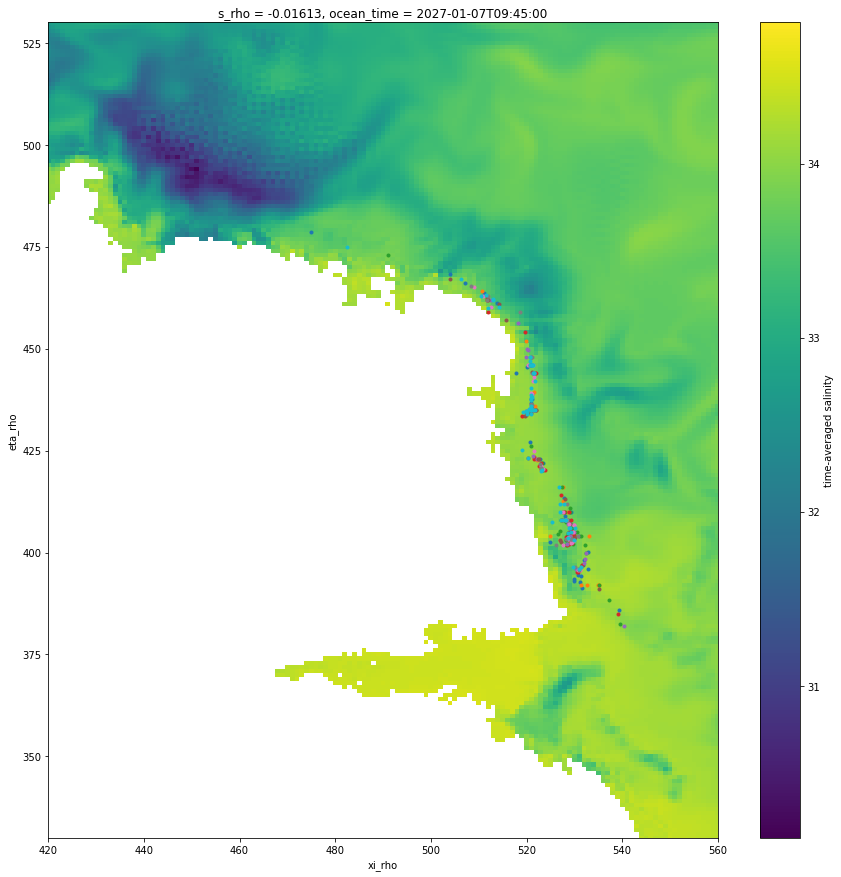

In [174]:
# # THESE ARE IN GRID POINTS not spherical
fig = plt.figure(figsize=(15,15))
#fig.tight_layout(pad=10)
#ax = fig.add_subplot(1, 1, 1)
ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
plt.xlim([420,560])
plt.ylim([330,530])
plt.scatter(list(group0tx),list(group0ty),marker='.',color='tab:blue')
plt.scatter(group1tx,group1ty,marker='.',color='tab:orange')
plt.scatter(group2tx,group2ty,marker='.',color='tab:green')
plt.scatter(group3tx,group3ty,marker='.',color='tab:red')
plt.scatter(group4tx,group4ty,marker='.',color='tab:purple')
plt.scatter(group5tx,group5ty,marker='.',color='tab:brown')
plt.scatter(group6tx,group6ty,marker='.',color='tab:pink')
plt.scatter(group7tx,group7ty,marker='.',color='tab:gray')
plt.scatter(group8tx,group8ty,marker='.',color='tab:cyan')

plt.savefig("/scratch/project_2000789/muramarg/SOM/meeting_1017/maxdt_groupings.png", dpi=300)

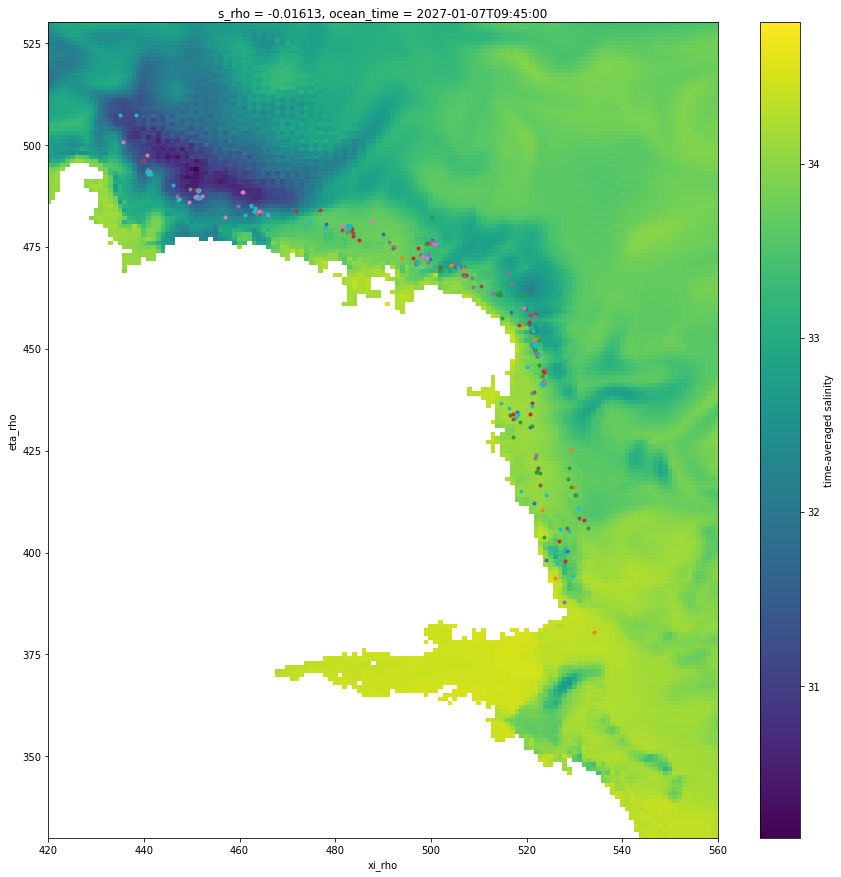

In [175]:
# # THESE ARE IN GRID POINTS not spherical
fig = plt.figure(figsize=(15,15))
#fig.tight_layout(pad=10)
#ax = fig.add_subplot(1, 1, 1)
ds1.salt.isel(s_rho=-1, ocean_time=1).plot()
plt.xlim([420,560])
plt.ylim([330,530])
plt.scatter(group0dx,group0dy,marker='.',color='tab:blue')
plt.scatter(group1dx,group1dy,marker='.',color='tab:orange')
plt.scatter(group2dx,group2dy,marker='.',color='tab:green')
plt.scatter(group3dx,group3dy,marker='.',color='tab:red')
plt.scatter(group4dx,group4dy,marker='.',color='tab:purple')
plt.scatter(group5dx,group5dy,marker='.',color='tab:brown')
plt.scatter(group6dx,group6dy,marker='.',color='tab:pink')
plt.scatter(group7dx,group7dy,marker='.',color='tab:gray')
plt.scatter(group8dx,group8dy,marker='.',color='tab:cyan')

plt.savefig("/scratch/project_2000789/muramarg/SOM/meeting_1017/maxdd_groupings.png", dpi=300)

## Select the points in AABW_idx that may be AABW

In [177]:
aabw_idx.shape

(1271,)

In [185]:
# look at the last lines of temp, density, and depth
aabw_temp_last = ds.variables["temp"].values[:,aabw_idx][-1]
aabw_dep_last = ds.variables["depth"].values[:,aabw_idx][-1]
dens_last = pot_dens[:,aabw_idx][-1]

In [186]:
df_aa = pd.DataFrame()
df_aa["temp"] = aabw_temp_last
df_aa["depth"] = aabw_dep_last
df_aa["density"] = dens_last
df_aa

,temp,depth,density
0,-2.145807,-1172.610107,28.209778
1,-0.216712,-2186.770752,28.749774
2,-0.103731,-1639.355591,28.481494
3,-0.274103,-1015.221619,28.167070
4,-0.243271,-2485.894287,28.886659
...,...,...,...
1266,-0.292429,-4405.093750,29.804022
1267,-0.356893,-2247.749268,28.767139
1268,-0.249169,-3407.947998,29.327270
1269,-0.299563,-4296.588867,29.749678


In [188]:
# select groups based on conditions
df_aa = df_aa[df_aa['temp'] <= -0]
df_aa = df_aa[df_aa['depth'] <= -1066.8]
df_aa = df_aa[df_aa['density'] > 28.27]
df_aa

,temp,depth,density
1,-0.216712,-2186.770752,28.749774
2,-0.103731,-1639.355591,28.481494
4,-0.243271,-2485.894287,28.886659
6,-0.372850,-1450.936035,28.383719
7,-0.246520,-2829.425049,29.050574
...,...,...,...
1266,-0.292429,-4405.093750,29.804022
1267,-0.356893,-2247.749268,28.767139
1268,-0.249169,-3407.947998,29.327270
1269,-0.299563,-4296.588867,29.749678
